# Distribution of Multiplication

In [2]:
# import requirements
import sympy
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from math import isqrt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
from scipy.optimize import fsolve
dirpath = os.path.dirname(os.path.abspath(__doc__))

In [3]:
# define variable
front = 1 # thresholf to ignore fist x value of countlst
rango = 1000 # range of positive integers to compute
threshold = 20 # higher countlst values are shown in plot
stack_size = 10 # size of stacking for prime numbers

# define lists
x_data = list()
countlst = list() # countlst[i] = x , where x is the possible multiplication ways to compute i
primelst = list() # where primerlst[i]==1 if i is prime
for i in range(rango):
    countlst.append(0)
    primelst.append(0)
    x_data.append(i)

## Computing

In [4]:
#computing countlst
for i in range(front, rango):
    for j in range(1, isqrt(i) + 1):
        if i % j == 0:
            countlst[i] += 1
            if j != i // j:
                countlst[i] += 1

# compute count mean
count_mean = np.average(countlst)
count_std_dev = np.std(countlst)
print(count_std_dev)
plot_count_mean = [count_mean for i in range(len(x_data))]

5.0082123557213505


In [5]:
# searching for primes
for i in range(rango):
    if sympy.isprime(i):
        primelst[i]=1
primes = [i for i in range(rango) if primelst[i] == 1]

# computing prime badges
histlst = list()
primesstack = list()
x_bar = [i for i in range(int(rango/stack_size))]
for i in range(0, len(primelst), stack_size):
    chunk = primelst[i:i+stack_size]
    count_primes = sum(chunk)
    histlst.append(count_primes)
for i in range(len(histlst)):
    if i==0:
        primesstack.append(histlst[i])
    else:
        primesstack.append(primesstack[i-1]+histlst[i])

In [6]:
# computing fits
x_data = np.array(x_data)
countlst = np.array(countlst)
slope, intercept = np.polyfit(x_data, countlst, 1)
fit = slope*x_data + intercept
print(f'Count fit: y = {slope}x+{intercept}')

x_bar_data = np.array(x_bar)
hist_data = np.array(histlst)
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c
params, covariance = curve_fit(exponential, x_bar_data, hist_data, maxfev=10000)
a, b, c = params
primefit = exponential(x_bar_data, a, b, c)
print(f'Prime fit: y = {a} * ^{b}*x +{c}')

Count fit: y = 0.0029841689841689834x+5.562407592407595
Prime fit: y = 2.0037316210962146 * ^0.15390170187645436*x +1.5395289536885017


## Plotting

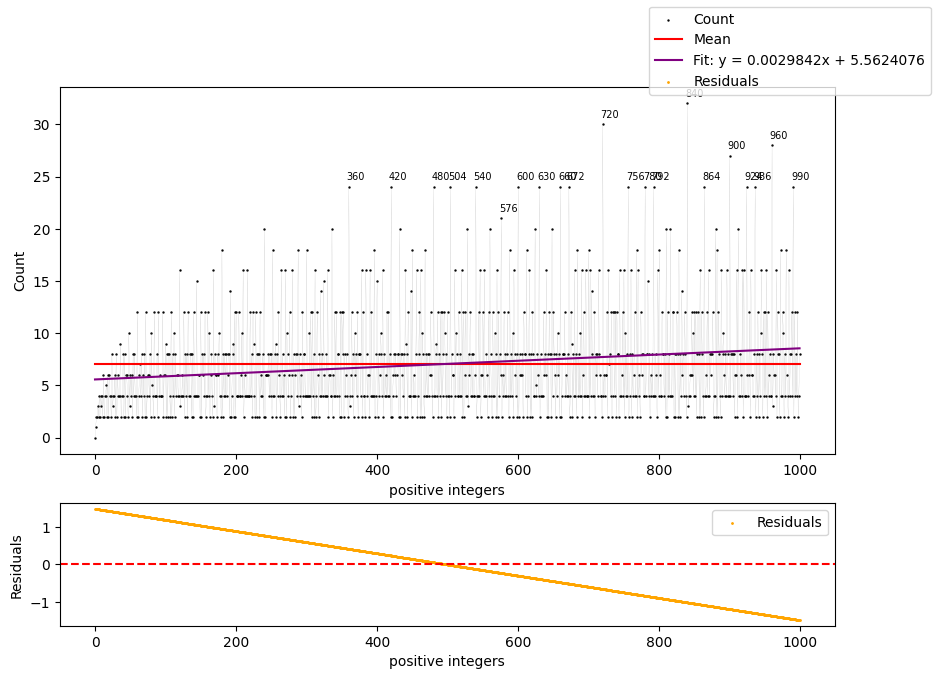

In [7]:
# plotting countfig
countfig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax = countfig.add_subplot(gs[0])
ax.plot(x_data, countlst, color=(0.5, 0.5, 0.5, 0.7), linewidth=0.1)
ax.scatter(x_data, countlst, color='black', label='Count', marker='o', s=0.5)
ax.plot(x_data, plot_count_mean, color='red', label='Mean')
ax.plot(x_data, fit, color='purple', label=f'Fit: y = {slope:.7f}x + {intercept:.7f}')
for i in range(len(x_data)):
    if countlst[i] > threshold:
        plt.annotate(f'{x_data[i]}', (x_data[i], countlst[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=7)
ax.set_xlabel('positive integers')
ax.set_ylabel('Count')


residuals = plot_count_mean-fit
ax2 = countfig.add_subplot(gs[1])
ax2.scatter(x_data, residuals, marker='o', label='Residuals', color='orange', s=1)
ax2.axhline(0, color='r', linestyle='--')
ax2.set_xlabel('positive integers')
ax2.set_ylabel('Residuals')
# ax2.fill_between(x_data, residuals, color=(0.7, 0.7, 0.7, 0.2))
ax2.legend()



countfig.legend()
countfig.savefig(f'{dirpath}/106countfig.png', dpi=512)
# plt.show()

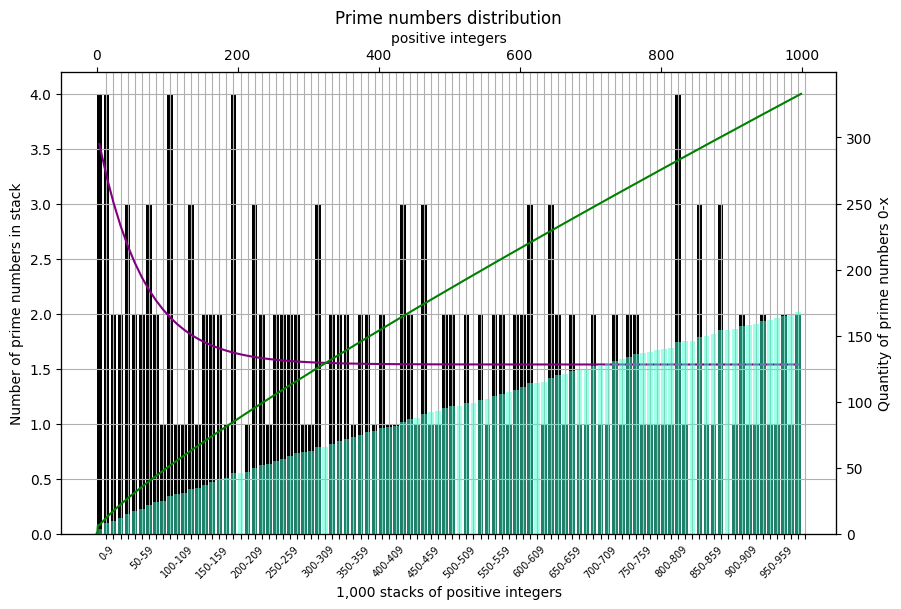

In [8]:
# plotting primefig
primefig, ax1 = plt.subplots(figsize=(10,6))
bars1 = ax1.bar(x_bar, histlst, color='black')
ax1.set_xticks(range(1, len(histlst) + 1))
ax1.set_xticklabels([f"{i * stack_size}-{(i + 1) * stack_size - 1}" for i in range(len(histlst))], rotation=45, fontsize=7)
labels = ax1.get_xticklabels()  # Get current labels
for i, label in enumerate(labels):
    if i % 5 != 0:  # Hide labels that are not multiples of 5
        label.set_visible(False)
ax1.set_xlabel('1,000 stacks of positive integers')
ax1.set_ylabel('Number of prime numbers in stack')


ax2 = ax1.twinx()
bars2 = ax2.bar(x_bar, primesstack, color=(0.25, 1.0, 0.82, 0.5))
ax2.set_ylabel('Quantity of prime numbers 0-x')



ax1.set_title('Prime numbers distribution')
ax1.grid(True)
primefig.savefig(f'{dirpath}/106primefig.png', dpi=512)
#plt.show()

ax1.plot(x_bar_data, primefit, color='purple')

x_data = list()
y_data = list()
for i in range(0, rango):
    x_data.append(i)
    if i==0:
        y_data.append(0)
    else:
        try:
            pi = i/(math.log10(i)) # x/log(x)
            y_data.append(pi)
        except ZeroDivisionError:
            y_data.append(0)

ax3 = ax2.twiny()
ax3.plot(x_data, y_data, label='π(x)', color='green')
ax3.set_xlabel('positive integers')
primefig.savefig(f'{dirpath}/106primetheorem.png', dpi=512)

## Tests

### Angle

In [9]:
# define functions
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

def derivative_exponential(x, a, b):
    return -a * b * np.exp(-b * x)

In [10]:
# define paramenters for functions  
a = -128390.42104270413
b = -0.00000015874774439859617
c = 128479.1002465980
m2 = 0.0000030003395083049023
intercept2 = 12.469816746017331

In [11]:
# find intercetption
def find_intersection(x):
    return exponential(x, a, b, c) - (m2 * x + intercept2)
x_intersect = fsolve(find_intersection, 0)[0]

In [12]:
# calculate slopes at intersection point
slope1 = derivative_exponential(x_intersect, a, b)
slope2 = m2

# calculate angle at intersection point
theta = np.arctan(abs((slope1 - slope2) / (1 + slope1 * slope2)))
theta_degrees = np.degrees(theta)

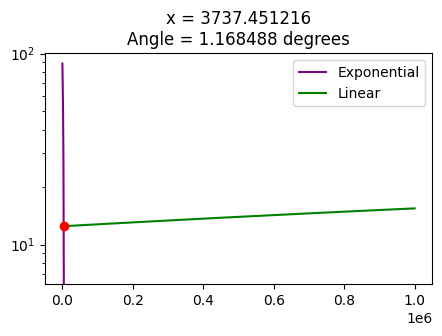

x = 3737.451216
Angle = 1.168488 degrees


In [13]:
# plot graphs
x_data = np.linspace(0, 1000000, 1000)
y1 = exponential(x_data, a, b, c)
y2 = m2 * x_data + intercept2
plt.figure(figsize=(5, 3))
plt.plot(x_data, y1, color='purple', label='Exponential')
plt.plot(x_data, y2, color='green', label='Linear')
plt.scatter([x_intersect], [exponential(x_intersect, a, b, c)], color='red', zorder=5)
plt.yscale('log')
plt.legend()
plt.title(f'x = {x_intersect:.6f}\nAngle = {theta_degrees:.6f} degrees')
plt.savefig(f'{dirpath}/quickplot.png', dpi=512)
plt.show()

print(f'x = {x_intersect:.6f}')
print(f'Angle = {theta_degrees:.6f} degrees')

### Slopes

In [15]:
slopes = slope1 * slope2
print(f"m1 (exp) = {slope1:.7f}")
print(f"m2 (linear) = {slope2:.7f}")
print(f"m1 * m2 = {slopes:.10f}")


m1 (exp) = -0.0203938
m2 (linear) = 0.0000030
m1 * m2 = -0.0000000612
